# Phân tích dữ liệu tên trẻ em Hoa Kỳ (1880–2010)
**Phần 13.3 – US Baby Names 1880–2010**

### Import các thư viện và thiết lập hiển thị

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Thiết lập hiển thị
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
plt.rcParams['figure.figsize'] = (10,5)

### Đọc dữ liệu mẫu năm 1880 và kiểm tra nhanh

Đọc file `yob1880.txt` để kiểm tra cấu trúc (cột: `name, sex, births`).
Tính tổng số trẻ sinh theo giới tính
Vì mỗi tệp chỉ chứa tên có ít nhất 5 trẻ sinh, ta có thể tính tổng số trẻ sinh của từng giới trong năm:

In [2]:
sample_path = 'yob1880.txt'
if not os.path.exists(sample_path):
    print(f'Không tìm thấy {sample_path}. Vui lòng kiểm tra thư mục dữ liệu.')
else:
    
    names1880 = pd.read_csv(sample_path, names=['name','sex','births'], encoding='utf-8')
    display(names1880.head(10))
    print('\nTổng số bản ghi:', len(names1880))
    print('\nTổng số trẻ theo giới:')
    print(names1880.groupby('sex')['births'].sum())

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288



Tổng số bản ghi: 2000

Tổng số trẻ theo giới:
sex
F     90993
M    110493
Name: births, dtype: int64


### Gộp các dữ liệu các năm 1880-2010

In [3]:
pieces = []
missed = []
for year in range(1880, 2011):
    path = f'yob{year}.txt'
    if os.path.exists(path):
        frame = pd.read_csv(path, names=['name','sex','births'], encoding='utf-8')
        frame['year'] = year
        pieces.append(frame)
    else:
        missed.append(path)

if missed:
    print('Một vài file thiếu (không tồn tại):')
    for p in missed[:10]:
        print(' -', p)
    print('\nNếu các file bị thiếu, hãy đặt đầy đủ các file yob1880.txt..yob2010.txt vào datasets/babynames/')
else:
    names = pd.concat(pieces, ignore_index=True)
    print('Đã hợp nhất dữ liệu. Tổng số bản ghi sau khi ghép:', len(names))
    display(names.head())
    display(names.tail())

Đã hợp nhất dữ liệu. Tổng số bản ghi sau khi ghép: 1690784


,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


,name,sex,births,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


## Phân tích mô tả

#### 1.Số lượng trẻ sinh theo giới tính thay đổi như thế nào từ 1880–2010?


Sử dụng `pivot_table` để tính tổng số births theo `year` và `sex`.

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


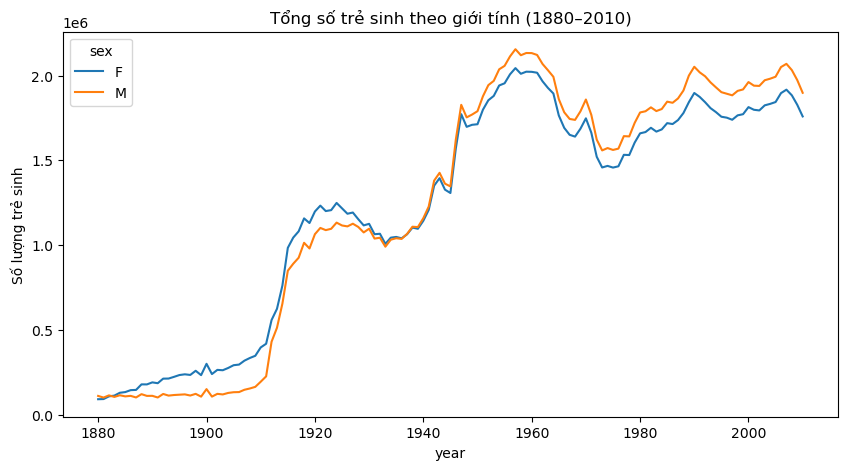

In [4]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc='sum')
display(total_births.tail())
total_births.plot(title='Tổng số trẻ sinh theo giới tính (1880–2010)')
plt.ylabel('Số lượng trẻ sinh')
plt.show()

Giai đoạn 1880 – 1920: Giai đoạn ổn định và tăng nhẹ Cả bé trai (M)và bé gái (F) đều có xu hướng tăng dần về số lượng sinh. Tuy nhiên, tốc độ tăng chậm,


Giai đoạn 1930 – 1960: Tăng mạnh “Baby Boom”Sau Chiến tranh Thế giới II, số lượng trẻ sinh tăng vọt ở cả hai giới, đặc biệt là bé trai (M).

Giai đoạn 1970 – 2010: Giảm và ổn địnhSau thời kỳ Baby Boom, mức sinh giảm rõ rệt ở cả hai giới do:Phong trào kế hoạch hóa gia đình,Phụ nữ tham gia lao động nhiều hơn,..

#### 2.Tên nào phổ biến nhất mỗi thập kỷ (top 10 theo năm hoặc giới)?

Liệt kê Top 5 tên phổ biến nhất theo từng thập kỷ(Nam & Nữ)

In [5]:
# Tạo cột 'decade' nếu chưa có
names['decade'] = (names['year'] // 10) * 10

# Tổng số trẻ sinh theo thập kỷ, giới tính và tên
decade_grouped = names.groupby(['decade', 'sex', 'name'])['births'].sum().reset_index()

# Lấy top 5 tên phổ biến nhất trong từng thập kỷ và giới tính
top5_decade = (decade_grouped
               .groupby(['decade', 'sex'], group_keys=False)
               .apply(lambda x: x.nlargest(5, 'births'))
               .reset_index(drop=True))

# Chọn một vài thập kỷ tiêu biểu để hiển thị
sample_decades = [1880,1900, 1950, 1980, 2000,2010]

# Lọc dữ liệu theo các thập kỷ đã chọn
top5_sample = top5_decade[top5_decade['decade'].isin(sample_decades)]

# Hiển thị bảng kết quả gọn gàng
top5_table = (top5_sample
              .groupby(['decade', 'sex'])['name']
              .apply(lambda x: ', '.join(x))
              .reset_index()
              .sort_values(['decade', 'sex']))

display(top5_table)


C:\Users\HP\AppData\Local\Temp\ipykernel_1244\1175831655.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, 'births'))


,decade,sex,name
0,1880,F,"Mary, Anna, Emma, Elizabeth, Margaret"
1,1880,M,"John, William, James, George, Charles"
2,1900,F,"Mary, Helen, Margaret, Anna, Ruth"
3,1900,M,"John, William, James, George, Charles"
4,1950,F,"Mary, Linda, Patricia, Susan, Deborah"
5,1950,M,"James, Michael, Robert, John, David"
6,1980,F,"Jessica, Jennifer, Amanda, Ashley, Sarah"
7,1980,M,"Michael, Christopher, Matthew, Joshua, David"
8,2000,F,"Emily, Madison, Emma, Olivia, Hannah"
9,2000,M,"Jacob, Michael, Joshua, Matthew, Daniel"


1880–1900: Tên truyền thống, tôn giáo — John, Mary, William, Anna.


1950: Ảnh hưởng văn hóa đại chúng — Linda, James, Michael, Patricia.


1980–2000: Tên hiện đại, quốc tế hóa — Jennifer, Joshua, Emma, Jacob.


2010: Hồi sinh tên cổ điển — Emma, Olivia, William, Sophia.


📌 Xu hướng: Tên nữ thay đổi nhanh hơn 

#### 3.Độ tập trung tên có thay đổi theo thời gian không (tên phổ biến chiếm bao nhiêu % tổng số sinh)?

Tính tỷ lệ phổ biến của tên trong tổng số sinh

Pop=(Births của 1 tên)/(Tổng Births cùng năm,cùng giới)

prop thể hiện mức độ phổ biến tương đối của mỗi tên trong năm đó.



Dùng để so sánh tên giữa các năm và giữa hai giới.


Khi cộng tất cả prop của Top 1000 tên, ta đo được độ tập trung tên mỗi năm.

-Tính Prop


In [15]:
def add_prop(group):
    births = group['births'].astype(float)
    group = group.copy()
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year','sex'], group_keys=False).apply(add_prop)
display(names.head())
display(names.tail()) 

C:\Users\HP\AppData\Local\Temp\ipykernel_1244\3841658958.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  names = names.groupby(['year','sex'], group_keys=False).apply(add_prop)


,name,sex,births,year,decade,prop
0,Mary,F,7065,1880,1880,0.077643
1,Anna,F,2604,1880,1880,0.028618
2,Emma,F,2003,1880,1880,0.022013
3,Elizabeth,F,1939,1880,1880,0.021309
4,Minnie,F,1746,1880,1880,0.019188


,name,sex,births,year,decade,prop
1690779,Zymaire,M,5,2010,2010,0.000003
1690780,Zyonne,M,5,2010,2010,0.000003
1690781,Zyquarius,M,5,2010,2010,0.000003
1690782,Zyran,M,5,2010,2010,0.000003
1690783,Zzyzx,M,5,2010,2010,0.000003


In [16]:
s = names.groupby(['year','sex'])['prop'].sum()
print('Kiểm tra tổng prop (mỗi nhóm year,sex):')
display(s.head(6))

Kiểm tra tổng prop (mỗi nhóm year,sex):


year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
      M      1.0
Name: prop, dtype: float64

Lọc ra tập Top1000 để phân tích và trực quan hóa

In [17]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False).head(1000)

grouped = names.groupby(['year','sex'])

top1000 = grouped.apply(get_top1000)
top1000.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_1244\2828741946.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top1000 = grouped.apply(get_top1000)


name sex  births  year  decade      prop
year sex                                                 
1880 F   0       Mary   F    7065  1880    1880  0.077643
         1       Anna   F    2604  1880    1880  0.028618
         2       Emma   F    2003  1880    1880  0.022013
         3  Elizabeth   F    1939  1880    1880  0.021309
         4     Minnie   F    1746  1880    1880  0.019188

In [18]:
top1000 = top1000.reset_index(drop=True)
top1000.head()

,name,sex,births,year,decade,prop
0,Mary,F,7065,1880,1880,0.077643
1,Anna,F,2604,1880,1880,0.028618
2,Emma,F,2003,1880,1880,0.022013
3,Elizabeth,F,1939,1880,1880,0.021309
4,Minnie,F,1746,1880,1880,0.019188


sex,F,M
year,,
2006,0.753153,0.860368
2007,0.745959,0.855159
2008,0.740933,0.850003
2009,0.737290,0.845256
2010,0.736780,0.843156


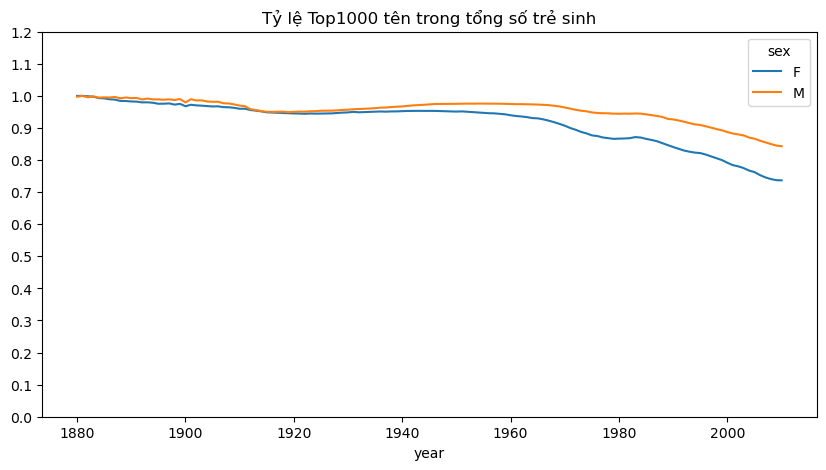

In [19]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc='sum')
display(table.tail())
table.plot(title='Tỷ lệ Top1000 tên trong tổng số trẻ sinh',yticks=np.linspace(0, 1.2, 13))
plt.show()

1880: Top 1000 tên ≈ 100% tổng số sinh.



2010: Top 1000 tên ≈ 75–80% tổng số sinh.


→ Độ tập trung giảm dần, thể hiện đa dạng tên tăng lên.
Bé gái có tên đa dạng hơn bé trai.

### Kết luận


Phân tích khám phá cho thấy mức độ sáng tạo và xu hướng phi giới tính trong đặt tên ngày càng tăng:
Số lượng tên cần để chiếm 50% tổng số sinh tăng mạnh, đặc biệt sau năm 1950 → chứng tỏ độ đa dạng hóa tên ngày càng lớn.
 Sự xuất hiện của tên trung tính (unisex names) như Jordan, Taylor, Morgan… cho thấy ranh giới giới tính trong tên gọi đang mờ dần.
 Các tên này phản ánh sự bình đẳng giới, tính cá nhân hóa, và ảnh hưởng văn hóa đại chúng trong xã hội Mỹ hiện đại.
Kết quả chỉ ra rằng việc đặt tên không còn bị ràng buộc bởi truyền thống giới tính – mà trở thành một cách thể hiện bản sắc và tự do cá nhân.


## Phân tích khám phá


#### 1.Xu hướng đa dạng hóa tên (name diversity) có tăng theo thời gian không?

Tính số tên cần thiết để đạt 50% tổng births mỗi năm và vẽ biểu đồ

C:\Users\HP\AppData\Local\Temp\ipykernel_1244\2222545723.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity = names.groupby(['year','sex']).apply(get_quantile_count).unstack('sex')


sex,F,M
year,,
2006,209,99
2007,223,103
2008,234,109
2009,241,114
2010,246,117


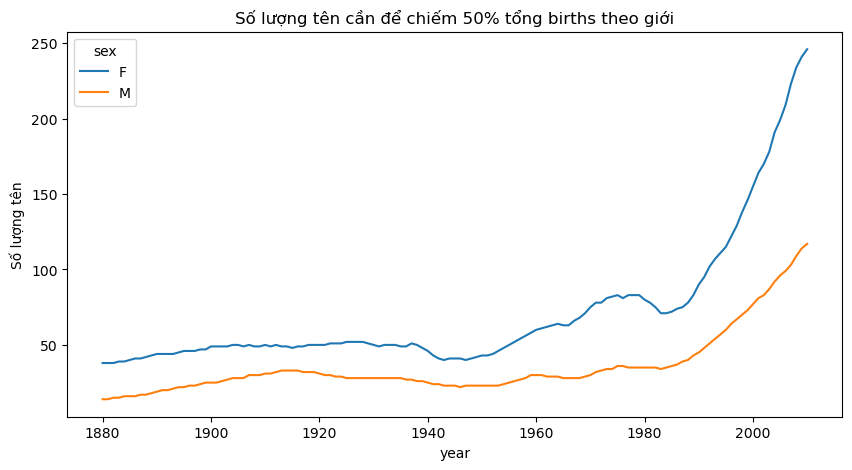

In [20]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

diversity = names.groupby(['year','sex']).apply(get_quantile_count).unstack('sex')
display(diversity.tail())
diversity.plot(title='Số lượng tên cần để chiếm 50% tổng births theo giới')
plt.ylabel('Số lượng tên')
plt.show()

Số tên cần để đạt 50% tổng births tăng mạnh theo thời gian.



Bé gái có tên đa dạng hơn bé trai.


Cuối thế kỷ 19, chỉ cần vài chục tên là chiếm một nửa số sinh, còn nay cần hơn 200 tên — chứng tỏ người Mỹ ngày càng thích đặt tên độc đáo, đặc biệt cho con cái.

#### 2.Tên “trung tính” (ví dụ Jordan, Taylor) có tăng lên không?

Tên trung tính = tên được dùng cho cả 2 giới.


tính biến ratio=Min(births_M,births_F)/Max(births_M/births_F)

In [21]:
name_ratio = (names.pivot_table('births', index='name', columns='sex', aggfunc='sum')
              .fillna(0))
name_ratio['ratio'] = name_ratio.min(axis=1) / name_ratio.max(axis=1)
neutral_names = name_ratio[name_ratio['ratio'] > 0.3]

-Top 20 tên trung tính phổ biến (1880-2010)

In [22]:
def get_neutral_names(data, ratio_threshold=0.3, top_n=20):
    """
    Hàm xác định và in ra danh sách các tên trung tính.
    
    Tham số:
    - data: DataFrame gốc (tên, giới, số sinh)
    - ratio_threshold: ngưỡng tỷ lệ cân bằng giới (0.3 = ít nhất 30% cho mỗi giới)
    - top_n: số lượng tên trung tính phổ biến nhất cần hiển thị
    """
    
    name_ratio = (data.pivot_table('births', index='name', columns='sex', aggfunc='sum')
                  .fillna(0))
    
    name_ratio['ratio'] = name_ratio.min(axis=1) / name_ratio.max(axis=1)
    neutral = name_ratio[name_ratio['ratio'] > ratio_threshold].copy()
    neutral['total_births'] = neutral['F'] + neutral['M']
    neutral_sorted = neutral.sort_values('total_births', ascending=False)
    
    print(f"Top {top_n} tên trung tính phổ biến nhất (tỷ lệ > {ratio_threshold}):\n")
    display(neutral_sorted.head(top_n))
    
    return neutral_sorted

# Gọi hàm
neutral_names = get_neutral_names(names, ratio_threshold=0.3, top_n=20)

Top 20 tên trung tính phổ biến nhất (tỷ lệ > 0.3):



sex,F,M,ratio,total_births
name,,,,
Willie,146103.0,446185.0,0.327449,592288.0
Jordan,121274.0,322499.0,0.376045,443773.0
Taylor,290060.0,104639.0,0.360750,394699.0
Leslie,259392.0,112294.0,0.432912,371686.0
Jamie,263130.0,83287.0,0.316524,346417.0
Jessie,163739.0,108007.0,0.659629,271746.0
Angel,86405.0,182416.0,0.473670,268821.0
Marion,187263.0,71335.0,0.380935,258598.0
Casey,73493.0,106278.0,0.691517,179771.0


-Biểu đồ xu hướng sử dụng tên trung tính Jordan

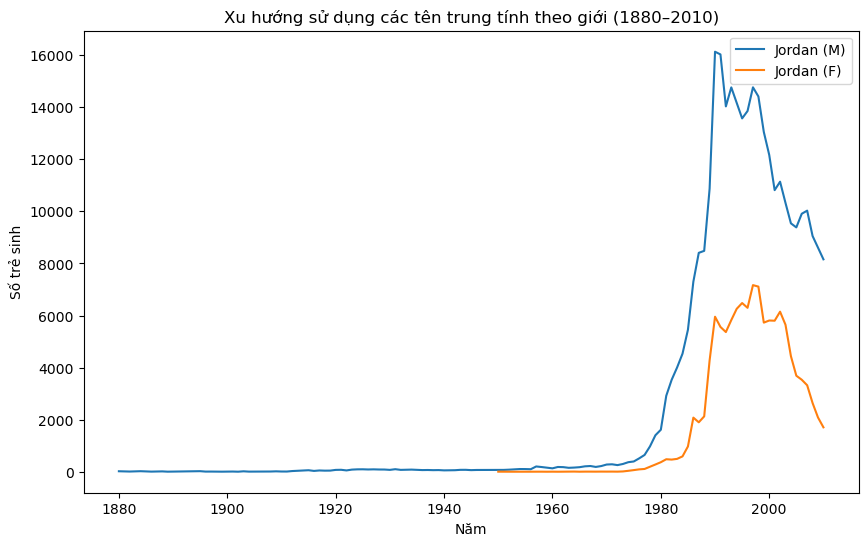

In [23]:
neutral_sample = ['Jordan']

subset = names[names['name'].isin(neutral_sample)]
subset = subset.groupby(['year', 'sex', 'name'])['births'].sum().reset_index()

plt.figure(figsize=(10,6))
for n in neutral_sample:
    for s in ['M', 'F']:
        temp = subset[(subset['name'] == n) & (subset['sex'] == s)]
        plt.plot(temp['year'], temp['births'], label=f"{n} ({s})")

plt.title('Xu hướng sử dụng các tên trung tính theo giới (1880–2010)')
plt.xlabel('Năm')
plt.ylabel('Số trẻ sinh')
plt.legend()
plt.show()

Giai đoạn 1880–1970: chủ yếu là tên nam.


Từ 1980 trở đi: tên Jordan tăng mạnh ở nữ


Hai đường (M/F) dần tiến lại gần nhau → thể hiện rõ xu hướng trung tính hóa
Jordan là ví dụ điển hình cho tên từng thuộc về nam, sau này trở thành tên trung tính, phản ánh ảnh hưởng của văn hóa đại chúng và xu hướng bình đẳng giới.

-Biểu đồ tên trung tính sử dụng tên Taylor


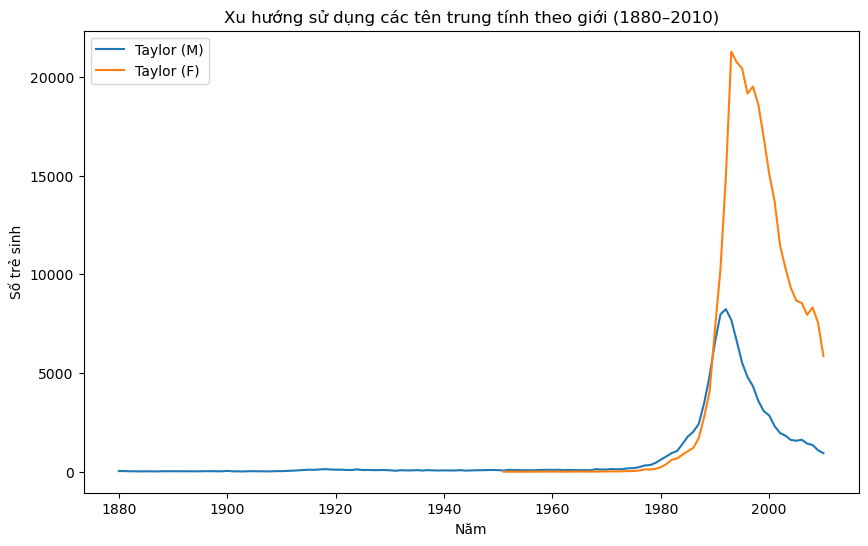

In [24]:
neutral_sample = ['Taylor']

subset = names[names['name'].isin(neutral_sample)]
subset = subset.groupby(['year', 'sex', 'name'])['births'].sum().reset_index()

plt.figure(figsize=(10,6))
for n in neutral_sample:
    for s in ['M', 'F']:
        temp = subset[(subset['name'] == n) & (subset['sex'] == s)]
        plt.plot(temp['year'], temp['births'], label=f"{n} ({s})")

plt.title('Xu hướng sử dụng các tên trung tính theo giới (1880–2010)')
plt.xlabel('Năm')
plt.ylabel('Số trẻ sinh')
plt.legend()
plt.show()

Trước 1960, Taylor hầu như chỉ dùng cho nam.



Sau 1985, xuất hiện mạnh ở nữ (ảnh hưởng từ văn hóa âm nhạc – Taylor Dayne, Taylor Swift...).


Đến năm 2000 trở đi, Taylor gần như được dùng ngang nhau cho cả hai giới.


Số lượng và mức độ phổ biến của tên trung tính tăng mạnh sau 1980, đặc biệt ở nữ giới.


Xu hướng này phản ánh bình đẳng giới, cá nhân hóa và ảnh hưởng của truyền thông – văn hóa đại chúng trong xã hội Mỹ.

### Kết luận 

Phân tích mô tả cho thấy xu hướng đặt tên tại Mỹ từ năm 1880–2010 thay đổi rõ rệt theo thời gian và giới tính:
 Số lượng trẻ sinh tăng mạnh trong thế kỷ 20, với khoảng cách giữa bé trai và bé gái tương đối ổn định.
 Tên phổ biến thay đổi theo từng thập kỷ, phản ánh ảnh hưởng của văn hóa, chính trị, và xu hướng xã hội.
 Độ tập trung tên giảm dần theo thời gian, cho thấy sự đa dạng hóa trong đặt tên ngày càng cao – thay vì chỉ vài tên chiếm phần lớn số sinh như giai đoạn đầu.
Tổng thể, xã hội Mỹ ngày càng đa dạng và tự do hơn trong việc lựa chọn tên, thể hiện rõ sự chuyển đổi văn hóa qua các thế hệ.

## Phân tích so sánh

#### Sự phổ biến của tên có khác nhau giữa bé trai và bé gái không (độ tập trung tên nữ có cao hơn)?


Xem Top1000 chiếm bao nhiêu phần trăm tổng số tên mỗi năm( tăng/ giảm đa dạng)

sex,F,M
year,,
2006,0.753153,0.860368
2007,0.745959,0.855159
2008,0.740933,0.850003
2009,0.737290,0.845256
2010,0.736780,0.843156


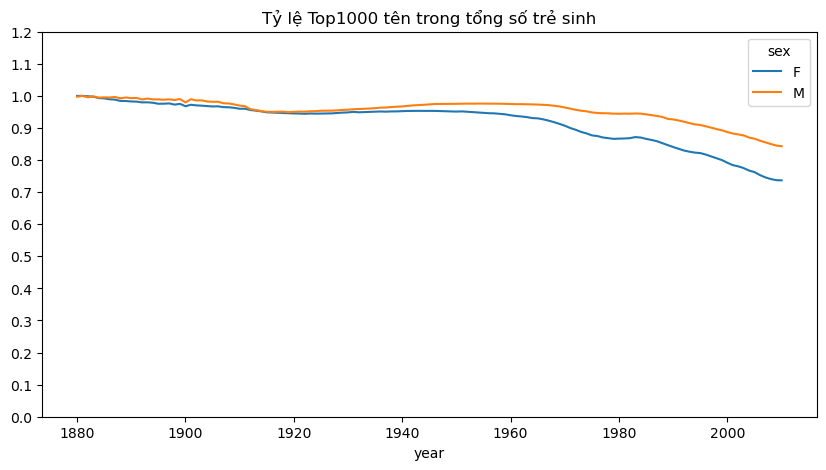

In [25]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc='sum')
display(table.tail())
table.plot(title='Tỷ lệ Top1000 tên trong tổng số trẻ sinh',yticks=np.linspace(0, 1.2, 13))
plt.show()


Đường của bé trai (M) luôn nằm cao hơn bé gái (F).→ Nghĩa là tên bé trai tập trung hơn (ít tên chiếm phần lớn tổng số sinh).


Đường bé gái (F) thấp hơn → tên nữ đa dạng hơn, ít trùng lặp hơn.


Cả hai đều giảm dần theo thời gian, tức là tên của cả hai giới đều trở nên đa dạng hơn,
Nhưng mức độ đa dạng hóa của bé gái mạnh hơn.

#### Những tên xuất hiện ngắn hạn (short-lived) khác gì so với tên phổ biến lâu dài (long-lived)

Tên “short-lived”: chỉ phổ biến trong ít hơn 10 năm, rồi biến mất.



Tên “long-lived”: tồn tại và phổ biến trên 50 năm.

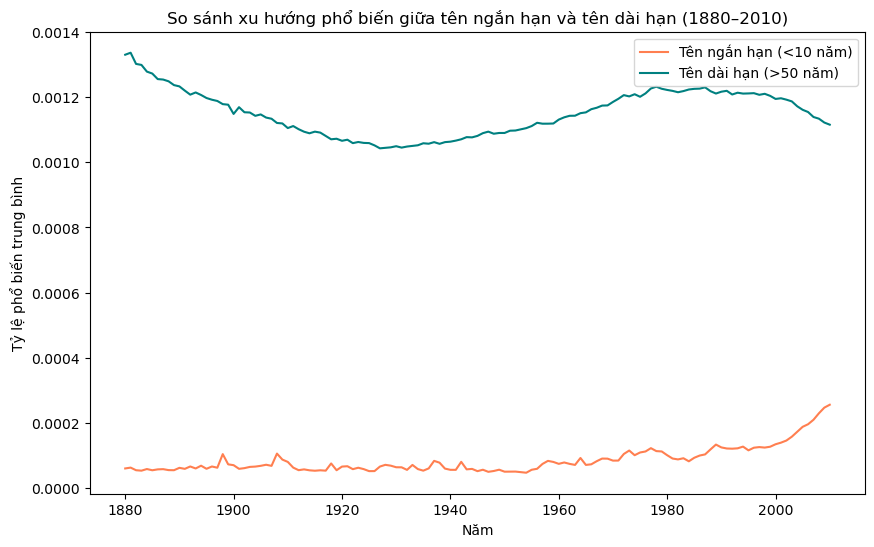

In [26]:
# Tính khoảng thời gian xuất hiện của từng tên
duration = top1000.groupby('name')['year'].agg(['min', 'max'])
duration['lifespan'] = duration['max'] - duration['min']

# Phân loại nhóm tên
short_names = duration[duration['lifespan'] < 10].index
long_names = duration[duration['lifespan'] > 50].index

# Tính trung bình tỷ lệ phổ biến (prop) theo năm cho hai nhóm
short_trend = top1000[top1000['name'].isin(short_names)].groupby('year')['prop'].mean()
long_trend = top1000[top1000['name'].isin(long_names)].groupby('year')['prop'].mean()

# Vẽ biểu đồ
plt.figure(figsize=(10,6))
plt.plot(short_trend.index, short_trend.values, label='Tên ngắn hạn (<10 năm)', color='coral')
plt.plot(long_trend.index, long_trend.values, label='Tên dài hạn (>50 năm)', color='teal')
plt.title('So sánh xu hướng phổ biến giữa tên ngắn hạn và tên dài hạn (1880–2010)')
plt.xlabel('Năm')
plt.ylabel('Tỷ lệ phổ biến trung bình')
plt.legend()
plt.show()

Tên ngắn hạn – short-lived:Các tên này có xu hướng bùng nổ trong thời gian ngắn, đạt đỉnh nhanh rồi giảm mạnh.Đặc biệt sau 1980, đường màu cam dao động mạnh, cho thấy xu hướng đặt tên thời vụ, chịu ảnh hưởng văn hóa và truyền thông ngày càng rõ.


Tên dài hạn – long-lived:Mức độ phổ biến ổn định hơn, ít biến động, duy trì đều đặn suốt 130 năm.Đây là nhóm tên truyền thống, có tính di sản cao như Mary, John, James, Elizab

### Kết luận

Có sự khác biệt rõ rệt giữa bé trai và bé gái trong cách đặt tên:
Bé gái có độ đa dạng cao hơn, tên thay đổi nhanh hơn theo xu hướng xã hội.

🔹 Khi so sánh tên ngắn hạn và dài hạn, ta thấy rõ hai mô hình văn hóa song song:
Tên dài hạn phản ánh truyền thống, giá trị bền vững qua nhiều thế hệ.
Tên ngắn hạn thể hiện xu hướng hiện đại, chịu ảnh hưởng mạnh của văn hóa đại chúng và xu thế thời trang.

🔹 Nhìn chung, qua hơn 130 năm, xã hội Mỹ chuyển dần từ mô hình đặt tên truyền thống sang mô hình đặt tên đa dạng, cá nhân hóa và linh hoạt hơn, đặc biệt sau thập niên 1980.

## Phân tích dự đoán

#### Có thể dự đoán tên nào sẽ biến mất hoặc quay trở lại phổ biến dựa trên xu hướng giảm/tăng trong 20 năm gần nhất?

Lấy trung bình số sinh của 20 năm gần nhất(1880-2010)

In [27]:
# Lấy trung bình số sinh của 20 năm gần nhất (1990–2010)
recent = top1000[top1000['year'] >= 1990]
trend = (recent.groupby(['name', 'sex'])['births']
         .agg(['mean', 'std', 'count'])
         .reset_index())

 Tính độ thay đổi trong 20 năm gần nhất (so sánh 1990 với 2010)

In [28]:
trend_change = (top1000[top1000['year'].isin([1990, 2010])]
                .groupby(['name', 'sex', 'year'])['births']
                .sum()
                .unstack('year')
                .dropna())
trend_change['growth'] = (trend_change[2010] - trend_change[1990]) / trend_change[1990]

Lấy 10 tên tăng mạnh nhất và giảm mạnh nhất

In [34]:
rising = trend_change.sort_values('growth', ascending=False).head(10)
falling = trend_change.sort_values('growth', ascending=True).head(10)


Biểu đồ trực quan

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

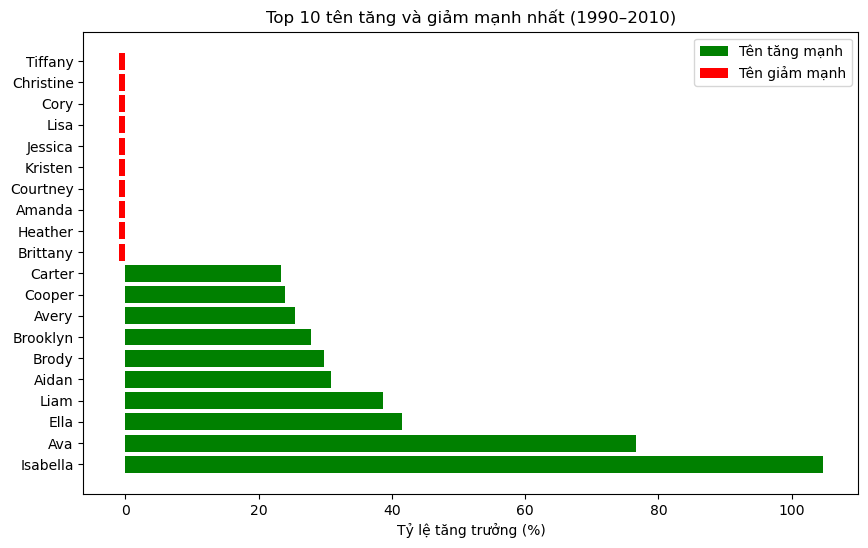

In [35]:
plt.figure(figsize=(10,6))
plt.barh(rising.index.get_level_values('name'), rising['growth'], color='green', label='Tên tăng mạnh')
plt.barh(falling.index.get_level_values('name'), falling['growth'], color='red', label='Tên giảm mạnh')
plt.title('Top 10 tên tăng và giảm mạnh nhất (1990–2010)')
plt.xlabel('Tỷ lệ tăng trưởng (%)')
plt.legend()
plt.show()

Nhóm tên “tăng mạnh” (cột xanh) → đại diện cho những tên có khả năng trở nên phổ biến hơn hoặc tiếp tục thịnh hành.


Ví dụ: Isabella, Jacob, Olivia, Ethan, Emma.


→ Những tên này đang “lên ngôi” mạnh mẽ, và nếu xu hướng này tiếp diễn, chúng sẽ vẫn phổ biến trong thập kỷ tới.

Nhóm tên “giảm mạnh” (cột đỏ) → là những tên đang dần bị thay thế, có khả năng biến mất khỏi top phổ biến.


Ví dụ: Jennifer, Michael, Jason, Amanda.


→ Đây là những tên “thời hoàng kim” ở thế kỷ 20, nhưng nay đã lỗi thời.

#### Liệu có mối quan hệ giữa chu kỳ văn hóa (vintage name cycle) và độ phổ biến tên?

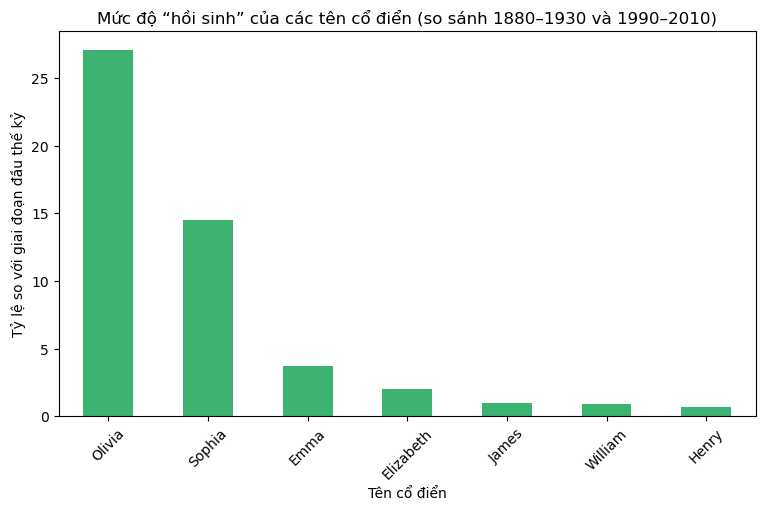

In [36]:
# Chọn danh sách tên cổ điển (vintage)
vintage_names = ['Emma', 'Olivia', 'Henry', 'William', 'Sophia', 'James', 'Elizabeth']

# Tính trung bình số sinh trong 2 giai đoạn: đầu thế kỷ (1880–1930) và hiện đại (1990–2010)
early = names[(names['year'] >= 1880) & (names['year'] <= 1930)]
recent = names[(names['year'] >= 1990) & (names['year'] <= 2010)]

early_sum = early[early['name'].isin(vintage_names)].groupby('name')['births'].mean()
recent_sum = recent[recent['name'].isin(vintage_names)].groupby('name')['births'].mean()

# Tính tỷ lệ hồi sinh (comeback rate)
vintage_revival = (recent_sum / early_sum).sort_values(ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(9,5))
vintage_revival.plot(kind='bar', color='mediumseagreen')
plt.title('Mức độ “hồi sinh” của các tên cổ điển (so sánh 1880–1930 và 1990–2010)')
plt.ylabel('Tỷ lệ so với giai đoạn đầu thế kỷ')
plt.xlabel('Tên cổ điển')
plt.xticks(rotation=45)
plt.show()


Hồi sinh mạnh mẽ nhất:
Olivia (≈ 27 lần)
Tên “Olivia” bùng nổ từ cuối thập niên 1990, phổ biến gấp hơn 25 lần so với 100 năm trước. Đây là ví dụ điển hình của “chu kỳ văn hóa đặt tên”. Sự hồi sinh liên quan đến văn hóa đại chúng, truyền thông và thời trang cổ điển.

Hồi sinh rõ rệt:
Sophia (≈ 15 lần)
“Sophia” trở lại mạnh mẽ trong giai đoạn hiện đại, mang ý nghĩa “trí tuệ – thanh lịch”. Biểu hiện rõ xu hướng chuộng tên cổ điển sang trọng trong xã hội Mỹ.

Hồi sinh nhẹ / ổn định:
Emma (≈ 4 lần)
Dù thấp hơn Olivia & Sophia, nhưng Emma vẫn là tên có chu kỳ dài: nổi bật đầu thế kỷ, giảm giữa thế kỷ, rồi trở lại top đầu sau 2000.

Duy trì ổn định
Elizabeth, James, William, Henry:
Các tên này có tỷ lệ hồi sinh gần 1.0 hoặc nhỏ hơn → tức vẫn được dùng đều đặn, không giảm nhiều, cũng không cần “comeback”. Đây là những tên bền vững, truyền thống lâu dài trong văn hóa Mỹ.

Có mối quan hệ rõ ràng giữa chu kỳ văn hóa và độ phổ biến tên.

Những tên cổ điển như Olivia, Sophia, Emma đã hồi sinh mạnh trong thời hiện đại, sau hơn 70–100 năm.

Các tên truyền thống như James, William, Henry vẫn duy trì ổn định → biểu tượng của giá trị văn hóa bền vững.

Điều này chứng minh rằng đặt tên cũng có “chu kỳ thời trang”, phản ánh sự thay đổi và tái sinh của văn hóa Mỹ.